## Clasificacion

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np


ruta=os.getcwd()
df=pd.read_csv(ruta +'\\data\\customer_churn.csv', index_col=0)

df=df[['Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag']]

df

,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,
0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,1926,794.0,0.602,3806,61,0.794,0.708,1
...,...,...,...,...,...,...,...,...
8096,2517,1625.0,0.809,2104,44,0.833,0.608,0
8097,0,7939.0,0.551,2269,42,0.312,0.000,0
8098,1547,767.0,0.804,4678,74,1.000,0.669,1


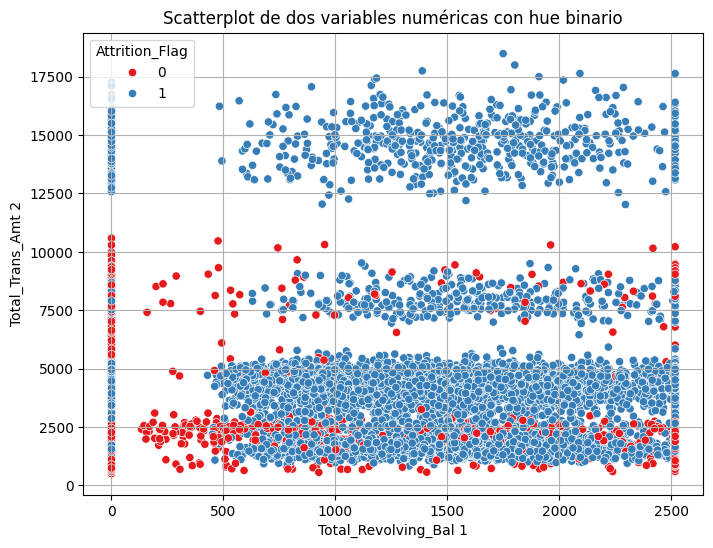

In [2]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df,x='Total_Revolving_Bal', y='Total_Trans_Amt', hue='Attrition_Flag', palette='Set1')

plt.title('Scatterplot de dos variables numéricas con hue binario')
plt.xlabel('Total_Revolving_Bal 1')
plt.ylabel('Total_Trans_Amt 2')
plt.legend(title='Attrition_Flag')
plt.grid(True)
plt.show()

In [11]:
#separacion 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

X=df.drop(columns='Attrition_Flag')
y=df['Attrition_Flag']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=4)

In [4]:
#modelo-entrenamiento

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='distance')

knc.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [5]:
#predicciones

y_pred=knc.predict(X_test)

In [ ]:

#metricas

from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,y_pred)
acc

0.8741362290227048

In [24]:
k_range = range(1,20)
accuracias = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean', weights='distance')
    scores=cross_val_score(knn, X,y, cv=5, scoring='accuracy')
    accuracias.append(scores.mean())

best_k = k_range[np.argmax(accuracias)]
print(f"El mejor valor de k es: {best_k}")


El mejor valor de k es: 11


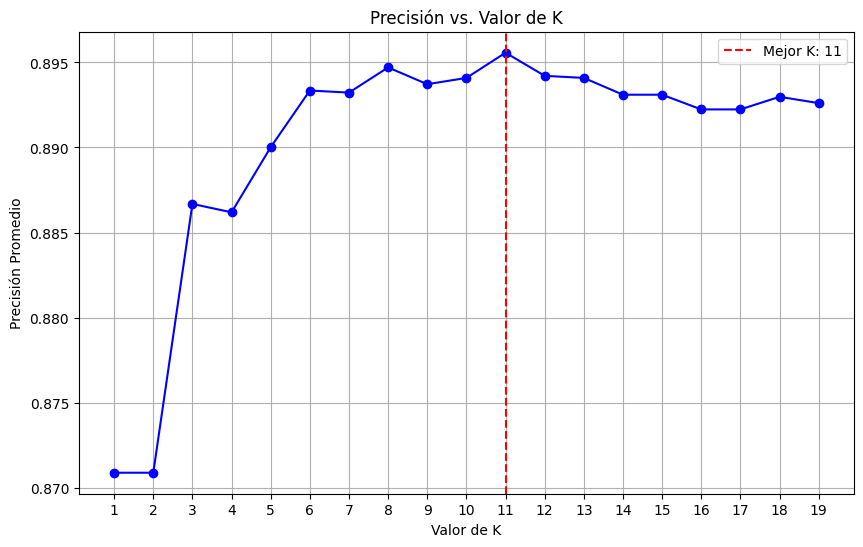

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracias, marker='o', linestyle='-', color='b')
plt.xlabel('Valor de K')
plt.ylabel('Precisión Promedio')
plt.title('Precisión vs. Valor de K')
plt.xticks(k_range)
plt.grid(True)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Mejor K: {best_k}')
plt.legend()
plt.show()

In [38]:
#hiperparamwetros 

param_grid = {
    # 'n_neighboors': [1,3,5,11]
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1,2,3]
}
knc=KNeighborsClassifier(n_neighbors=11)

grid_search = RandomizedSearchCV(
    estimator=knc,
    param_distributions=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=1

)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Lenovo\Desktop\UDEMY\02-DS\ds\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=11),
                   n_jobs=1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=1)

In [39]:
#obtener los mejores parametros 

best_params=grid_search.best_params_
best_score=grid_search.best_score_ 
best_model=grid_search.best_estimator_ 

print(best_params,best_score,best_model)

{'weights': 'uniform', 'p': 3, 'metric': 'manhattan'} 0.8949794238683128 KNeighborsClassifier(metric='manhattan', n_neighbors=11, p=3)


## Regresion

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
ruta=os.getcwd()
df=pd.read_csv(ruta +'\\data\\precio_vivienda.csv', index_col=0)
df.reset_index(inplace=True)
df=df[['precio', 'm2', 'antiguedad', 'renta_zona',
       'poblacion_zona']]
df

,precio,m2,antiguedad,renta_zona,poblacion_zona
0,317710.2,243.18,5.68,79545.46,23086.80
1,451767.3,234.83,6.00,79248.64,40173.07
2,317696.4,288.28,5.87,61287.07,36882.16
3,378185.1,200.50,7.19,63345.24,34310.24
4,189282.9,268.08,5.04,59982.20,26354.11
...,...,...,...,...,...
4995,318058.2,217.02,7.83,60567.94,22837.36
4996,444785.4,230.20,7.00,78491.28,25616.12
4997,309219.0,177.05,7.25,63390.69,33266.15
4998,359597.1,246.81,5.53,68001.33,42625.62


In [2]:
df.columns

Index(['precio', 'm2', 'antiguedad', 'renta_zona', 'poblacion_zona'], dtype='object')

In [ ]:
# plt.figure(figsize=(8, 6))

# sns.scatterplot(data=df,x='renta_zona', y='antiguedad', hue='precio', palette='Set1')

# plt.title('Scatterplot de dos variables numéricas con hue binario')
# plt.xlabel('renta_zona 1')
# plt.ylabel('poblacion_zona 2')
# plt.legend(title='precio')
# plt.grid(True)
# plt.show()

KeyboardInterrupt: 

In [3]:
#separacion 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

X=df.drop(columns='precio')
y=df['precio']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=4)

In [4]:
#escalado 

from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
X_train_scaled

array([[ 0.710232  , -1.68165335,  1.49031527, -1.64641948],
       [-0.52457103, -0.11045476,  0.20470484, -1.49372898],
       [ 2.39838462, -1.23849477,  0.24019949, -0.04489844],
       ...,
       [ 0.34915122,  0.03055024,  1.04601511, -1.54235589],
       [-1.51154739, -0.51332619,  1.38820038,  1.21532101],
       [-0.18380936,  0.41327811, -0.24811182, -0.80184051]])

In [9]:
#modelo-entrenamiento

from sklearn.neighbors import KNeighborsRegressor

knc = KNeighborsRegressor(n_neighbors=3, metric='euclidean', weights='distance')

knc.fit(X_train_scaled,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3, weights='distance')

In [11]:
#predicciones

y_pred=knc.predict(X_test)

#metricas

from sklearn.metrics import root_mean_squared_error

acc=root_mean_squared_error(y_test,y_pred)
acc

c:\Users\Lenovo\Desktop\UDEMY\02-DS\ds\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


np.float64(284837.95165738644)

El mejor valor de k es: 93


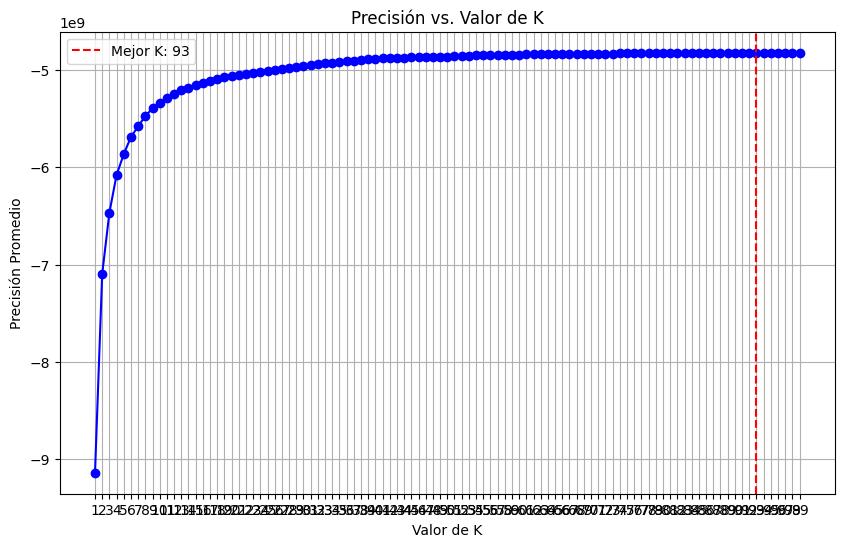

In [15]:
k_range = range(1,100)
mse = []
for i in k_range:
    knn = KNeighborsRegressor(n_neighbors=i, metric='euclidean', weights='distance')
    scores=cross_val_score(knn, X,y, cv=5, scoring='neg_mean_squared_error')
    mse.append(scores.mean())

best_k = k_range[np.argmax(mse)]
print(f"El mejor valor de k es: {best_k}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, mse, marker='o', linestyle='-', color='b')
plt.xlabel('Valor de K')
plt.ylabel('Precisión Promedio')
plt.title('Precisión vs. Valor de K')
plt.xticks(k_range)
plt.grid(True)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Mejor K: {best_k}')
plt.legend()
plt.show()

In [16]:
#hiperparamwetros 

param_grid = {
    # 'n_neighboors': [1,3,5,11]
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1,2,3]
}
knc=KNeighborsRegressor(n_neighbors=93)

grid_search = RandomizedSearchCV(
    estimator=knc,
    param_distributions=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=1

)

grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Lenovo\Desktop\UDEMY\02-DS\ds\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=93),
                   n_jobs=1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_squared_error', verbose=1)

In [17]:
#obtener los mejores parametros 

best_params=grid_search.best_params_
best_score=grid_search.best_score_ 
best_model=grid_search.best_estimator_ 

print(best_params,best_score,best_model)

{'weights': 'distance', 'p': 1, 'metric': 'euclidean'} -1572244682.4122076 KNeighborsRegressor(metric='euclidean', n_neighbors=93, p=1, weights='distance')
